In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.signal import find_peaks
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#import the train and test datasets
df0 = pd.read_csv('mitbih_train.csv', header = None)
df1 = pd.read_csv('mitbih_test.csv', header = None )

In [3]:
#show the number of columns in each dataframe
columns_df0 = df0.columns
print("'mitbih_train.csv: ", columns_df0)
print('     ')
print('#############################################################################')
print('             ')
columns_df1 = df1.columns
print("mitbih_test.csv: ", columns_df1)


'mitbih_train.csv:  Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
           dtype='int64', length=188)
     
#############################################################################
             
mitbih_test.csv:  Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
           dtype='int64', length=188)


In [4]:
# concatenate the dataframes to make one dataframe dfs
dfs = [df0, df1]
dfs = pd.concat(dfs, axis=0)

In [5]:
dfs.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dfs.info()#data shows all the information about the datafarme including number of reows and columns
#and the data types and amount of memory

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109446 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 157.8 MB


In [7]:
# check for missing values, we can see that there are no null values in the dataframe
dfs.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [8]:
# finding out the number of unique values in each column
# we can see that in column 187 there are five unique values which stand for the classification 
#of the different ecg classes 
dfs.nunique()

0      26912
1      48772
2      57132
3      46919
4      44736
       ...  
183     1128
184     1033
185      961
186      912
187        5
Length: 188, dtype: int64

In [9]:
dfs.shape #shape of the merged dataframe showing 109446, rows and 188 columns,  the last being for the categories 

(109446, 188)

In [10]:
#randomise the dataframe and reset index
dfs = dfs.sample(frac=1).reset_index(drop = True)

In [11]:
dfs.head(20)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.691667,0.166667,0.013889,0.038889,0.036111,0.005556,0.002778,0.000000,0.002778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.774487,0.232346,0.143508,0.129841,0.104784,0.077449,0.091116,0.059226,0.100228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.892982,0.428070,0.128070,0.182456,0.198246,0.157895,0.154386,0.156140,0.140351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.831099,0.310992,0.040214,0.040214,0.053619,0.029491,0.008043,0.005362,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.907692,0.712821,0.533333,0.307692,0.153846,0.123077,0.174359,0.164103,0.158974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.975332,0.747628,0.018975,0.011385,0.000000,0.024668,0.062619,0.096774,0.092979,0.108159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.000000,0.820475,0.495549,0.197329,0.000000,0.060831,0.129080,0.111276,0.091988,0.081602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.995614,0.894737,0.320175,0.006579,0.160088,0.175439,0.094298,0.072368,0.072368,0.078947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.898734,0.857595,0.496835,0.000000,0.072785,0.205696,0.300633,0.306962,0.341772,0.348101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.010336,0.060724,0.142119,0.241602,0.310078,0.383721,0.454780,0.498708,0.568475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [12]:
dfs = dfs.rename(columns={187: 'classes'})

In [13]:
# describe the dfs dataframe in terms of metrics like count, mean, standard deviation
dfs.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,classes
count,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,...,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000,109446.000000
mean,0.891170,0.758909,0.424503,0.219602,0.201237,0.210298,0.205607,0.201617,0.198480,0.196610,...,0.004937,0.004568,0.004237,0.003914,0.003673,0.003469,0.003210,0.002956,0.002835,0.473439
std,0.239657,0.221190,0.227561,0.207248,0.177191,0.171965,0.178374,0.177020,0.171469,0.168028,...,0.043951,0.042109,0.040471,0.038801,0.037465,0.036552,0.035015,0.033413,0.032620,1.143232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922252,0.682648,0.251014,0.048853,0.082418,0.088300,0.073171,0.066093,0.064893,0.068615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991202,0.826560,0.430174,0.166355,0.147842,0.158640,0.145078,0.144465,0.150073,0.148849,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910868,0.579832,0.342707,0.259045,0.287500,0.298343,0.295235,0.290623,0.283465,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [14]:
#convert the last column to integer
dfs['classes']=dfs['classes'].astype(int)

In [15]:
# get the number of unique values in the last column and use it to plot a bar chart
# to visualise the categories
categories =dfs['classes'].value_counts()
categories

0    90589
4     8039
2     7236
1     2779
3      803
Name: classes, dtype: int64

In [17]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = 'ECG data'
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_12656\1307321360.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


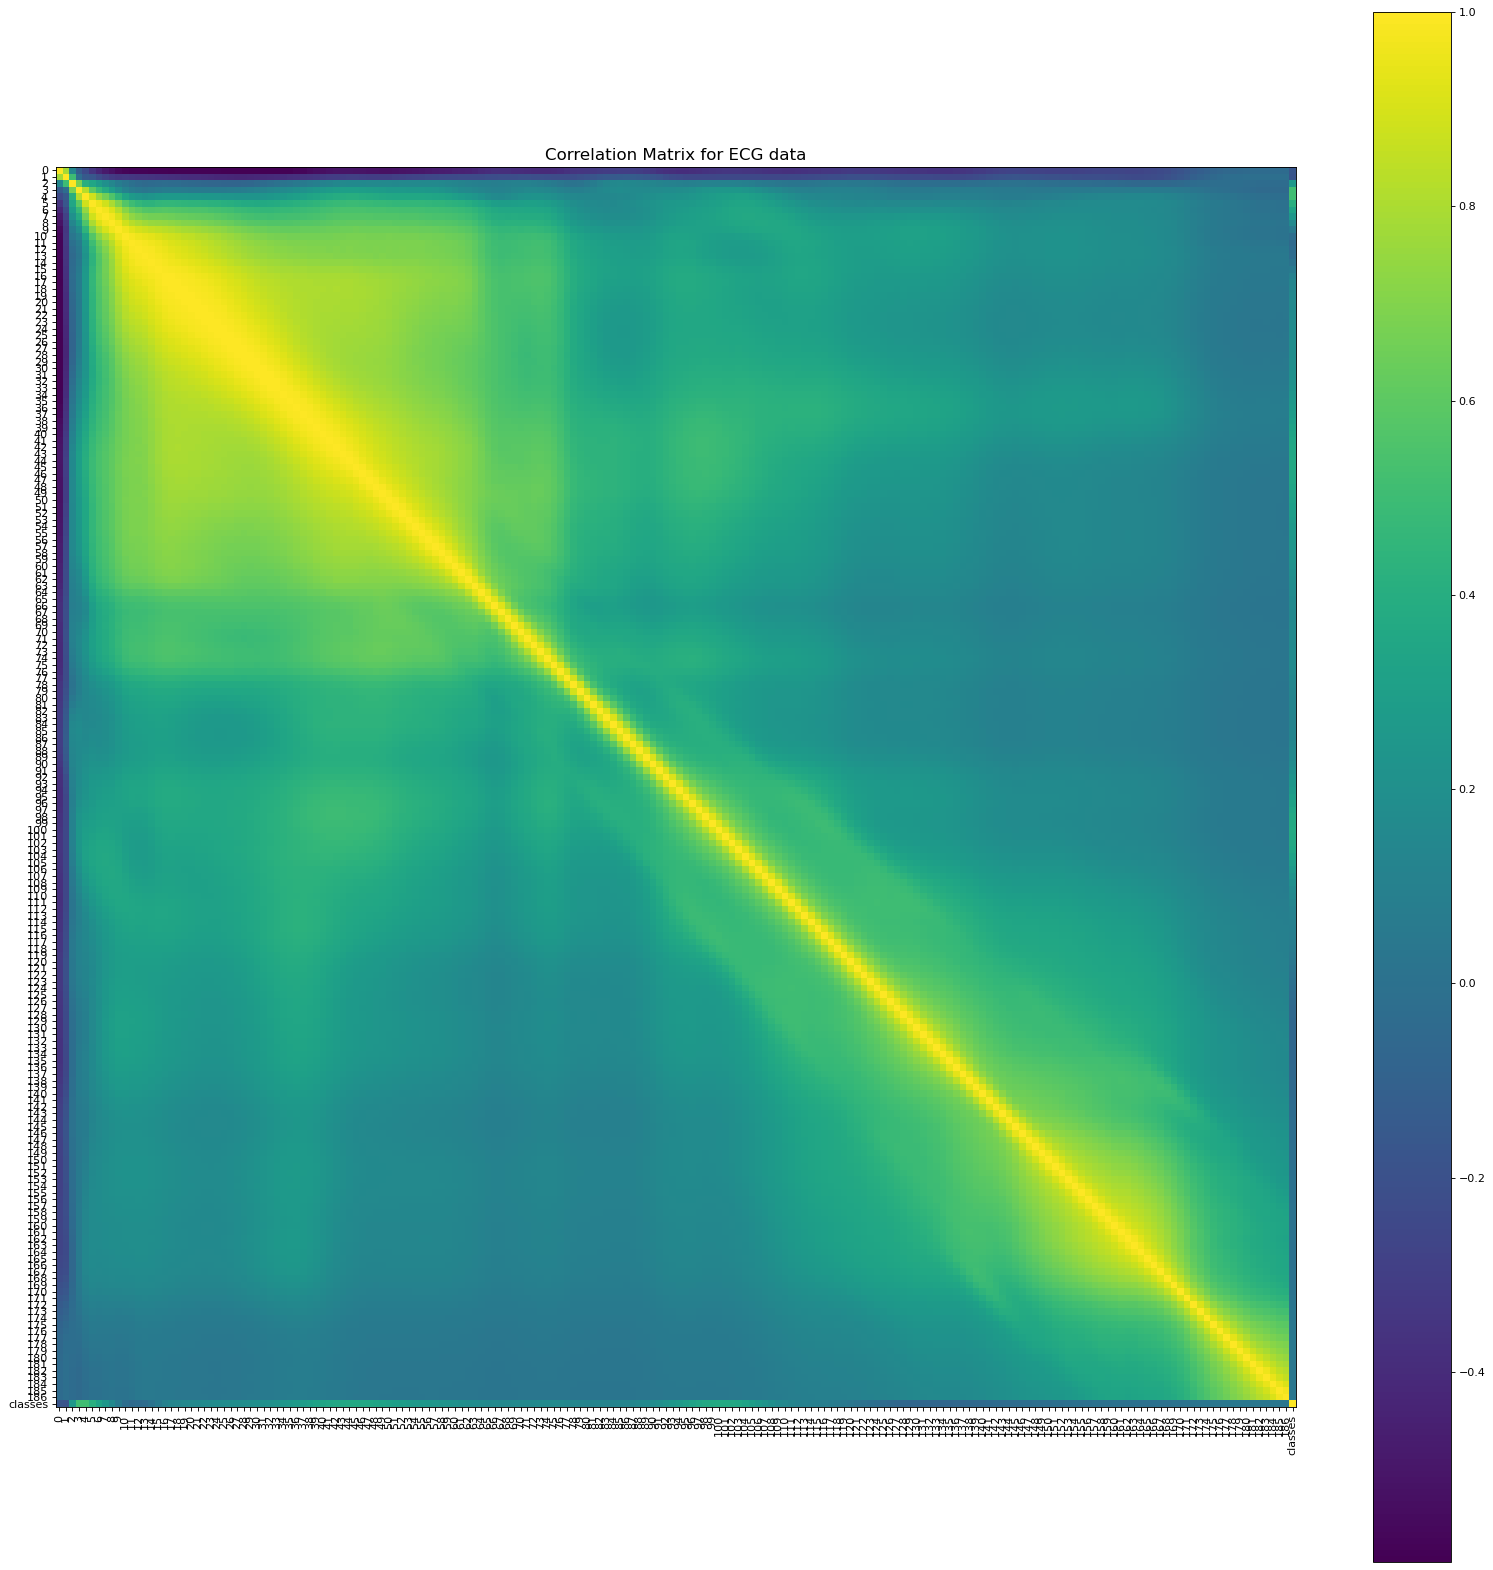

In [18]:
plotCorrelationMatrix(dfs, 25)

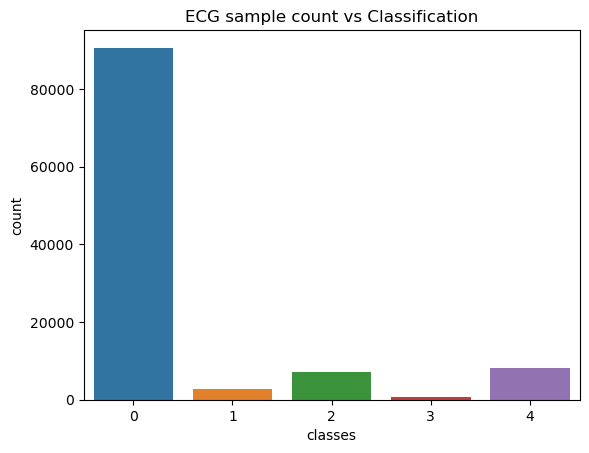

In [19]:
# performing a countplot to visualise the data based on the number of classes column
sns.countplot(x='classes', data=dfs)
plt.title('ECG sample count vs Classification')
plt.show()

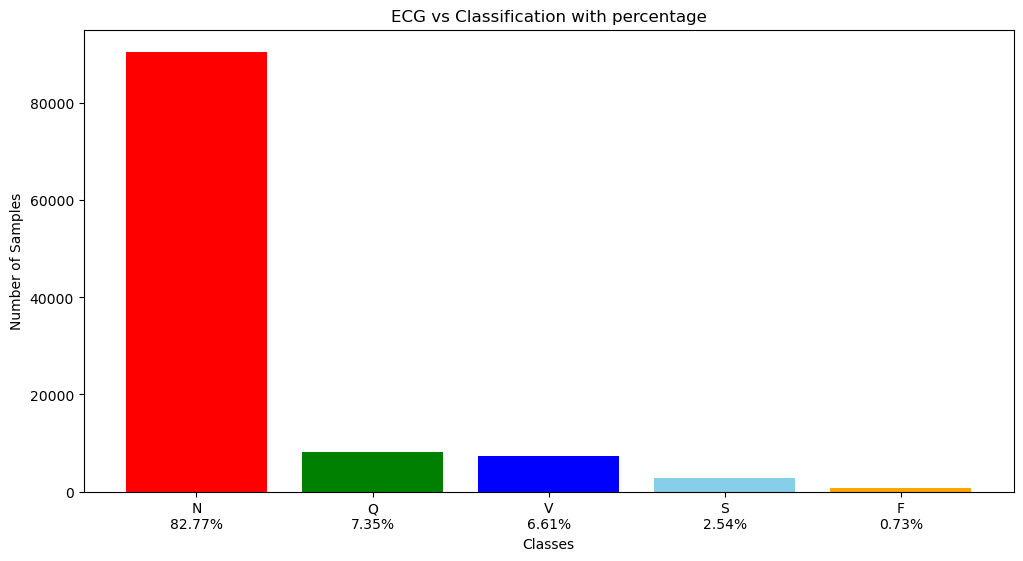

In [20]:
#use categories to plot a bar chart to visualise the distribution categories 
# Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

# Create an array with the positions of the bars on the x-axis
positions = np.arange(len(categories))

# Create the bar chart
for i in categories:
    i = categories / len(dfs) * 100 
    
plt.figure(figsize=(12,6))
plt.bar(positions, categories, color=['red','green','blue','skyblue','orange'])
plt.title('ECG vs Classification with percentage')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')

# Create names on the x-axis
plt.xticks(positions, [f'N\n{i.values[0]:.2f}%',f'Q\n{i.values[1]:.2f}%',
                       f'V\n{i.values[2]:.2f}%',f'S\n{i.values[3]:.2f}%',
                       f'F\n{i.values[4]:.2f}%'])

# Show the graph
plt.show()
    

the graph shows that the category 'N' which means normal beats is in the overwhelming majority

### define a function to choose one sample per class

In [21]:
def indi_sample(dfs):
    return dfs.sample(1)
sample_per_class = dfs.groupby('classes', group_keys = False).apply(indi_sample)    

In [22]:
sample_per_class

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,classes
65298,0.824701,0.601594,0.374502,0.119522,0.000000,0.000000,0.087649,0.095618,0.123506,0.119522,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6956,1.000000,0.882096,0.253275,0.021834,0.065502,0.126638,0.109170,0.157205,0.218341,0.174672,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
68100,0.000000,0.038462,0.108392,0.178322,0.269231,0.356643,0.444056,0.510490,0.566434,0.601399,...,0.520979,0.506993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
65635,1.000000,0.837545,0.368231,0.252708,0.169675,0.086643,0.090253,0.093863,0.072202,0.043321,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
15414,0.496259,0.416459,0.379052,0.376559,0.336658,0.311721,0.264339,0.224439,0.174564,0.077307,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


### from the dataframe above,  we can have a look at individual examples of each ecg class 

Text(0, 0.5, 'Amplitude')

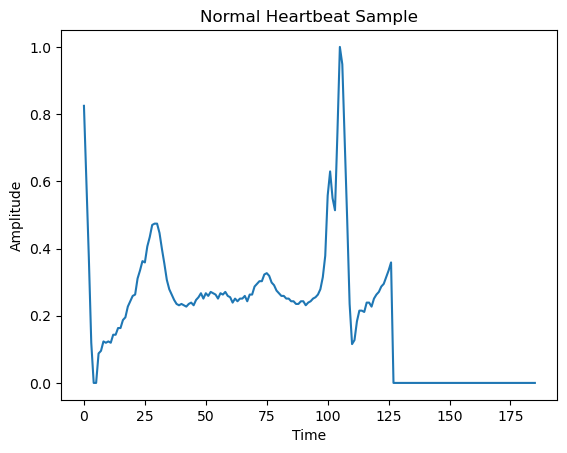

In [23]:
# class N normal beat
plt.plot(sample_per_class.iloc[0,:186])
plt.title('Normal Heartbeat Sample')
plt.xlabel('Time')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

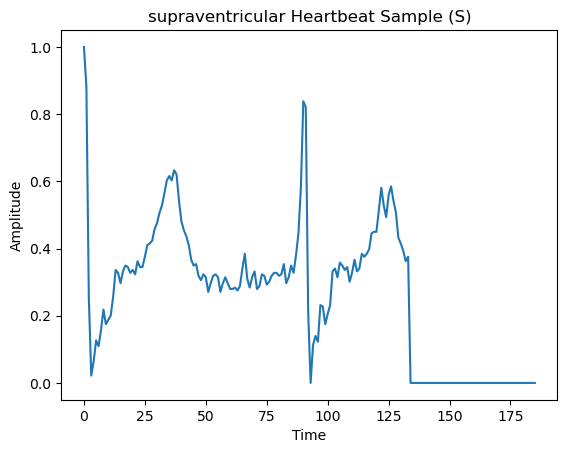

In [24]:
# class S supraventricular beat
plt.plot(sample_per_class.iloc[1,:186])
plt.title('supraventricular Heartbeat Sample (S)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

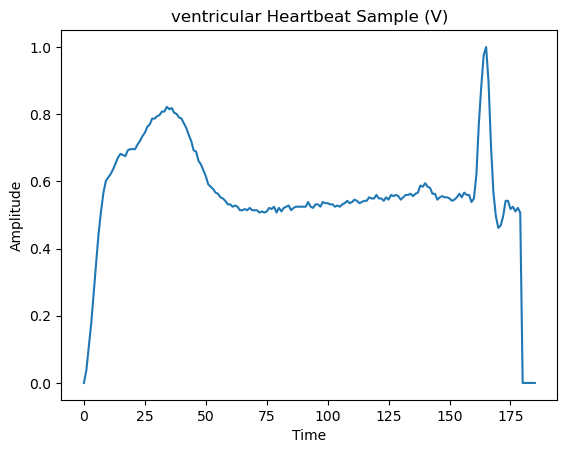

In [25]:
# class V ventricular beat
plt.plot(sample_per_class.iloc[2,:186])
plt.title('ventricular Heartbeat Sample (V)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

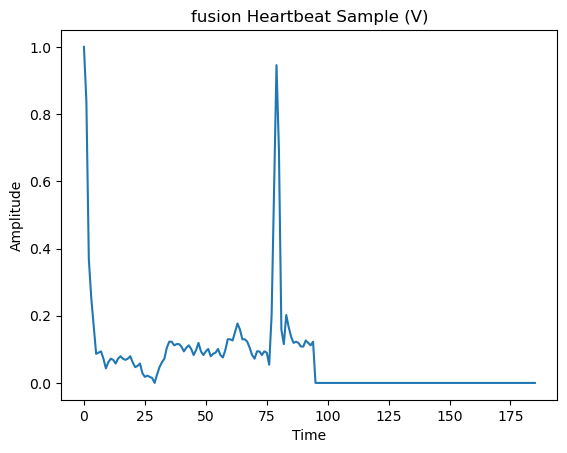

In [26]:
# class F  fusion beat
plt.plot(sample_per_class.iloc[3,:186])
plt.title('fusion Heartbeat Sample (V)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

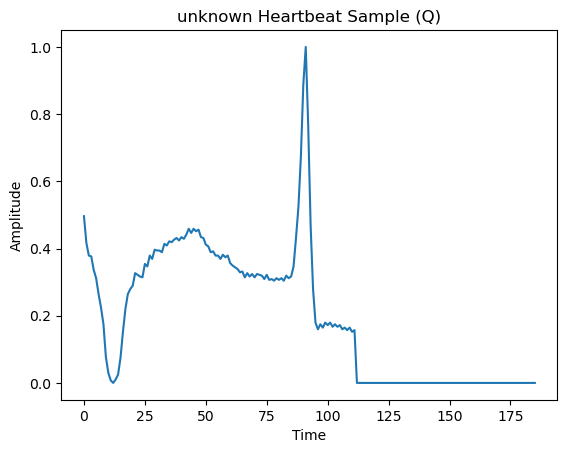

In [27]:
# class Q is unknown beat
plt.plot(sample_per_class.iloc[4,:186])
plt.title('unknown Heartbeat Sample (Q)')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Feature Selection
### Here we seperate the dataframe into features and target variabes X and y


From observations,  we know that the last column in the dataset represents the classes that signify the type of heartbeat signal Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]. Thus, the  'classes'
column will be dropped from the dataset and used as the target or output and the rest of the
dataframe,X as the input .variable.

In [28]:
# differentiate the X inputs from the y outputs
y = dfs['classes']

In [29]:
y.shape

(109446,)

In [30]:
y

0         0
1         0
2         0
3         0
4         0
         ..
109441    0
109442    0
109443    0
109444    0
109445    0
Name: classes, Length: 109446, dtype: int32

In [31]:
X = dfs.drop('classes', axis = 1)

In [32]:
X.shape

(109446, 187)

In [33]:
X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.691667,0.166667,0.013889,0.038889,0.036111,0.005556,0.002778,0.000000,0.002778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.774487,0.232346,0.143508,0.129841,0.104784,0.077449,0.091116,0.059226,0.100228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.892982,0.428070,0.128070,0.182456,0.198246,0.157895,0.154386,0.156140,0.140351,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.831099,0.310992,0.040214,0.040214,0.053619,0.029491,0.008043,0.005362,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.907692,0.712821,0.533333,0.307692,0.153846,0.123077,0.174359,0.164103,0.158974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109441,0.916107,1.000000,0.640940,0.191275,0.083893,0.063758,0.057047,0.062081,0.078859,0.142617,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109442,1.000000,0.830084,0.487465,0.069638,0.064067,0.203343,0.300836,0.364902,0.370474,0.398329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109443,0.992110,0.865878,0.299803,0.076923,0.029586,0.000000,0.007890,0.047337,0.171598,0.339251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109444,0.131105,0.205656,0.352185,0.465296,0.542416,0.652956,0.745501,0.781491,0.776350,0.791774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Validation using RandomForest Classifier

In [86]:
# Split the dataset into a training set and a val set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# model validation using the random forrest clasifier
clf = RandomForestClassifier()

In [88]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
y_validation_prediction = clf.predict(X_val)

In [90]:
acc = accuracy_score (y_val, y_validation_prediction) * 100

In [91]:
print(f' Validation Accuracy: {acc :.2f}%') 

 Validation Accuracy: 97.39%


In [92]:
train_pred_RF = clf.predict(X_train)

In [93]:
recall_RF = recall_score(y_val, y_validation_prediction, average = 'micro') * 100
print(f' Validation Recall: {recall_RF :.2f}%') 

 Validation Recall: 97.39%


In [94]:
precision_RF = precision_score(y_val, y_validation_prediction, average = 'micro' ) * 100
print(f' Validation precision: {precision_RF :.2f}%') 

 Validation precision: 97.39%


In [95]:
F_score_RF = f1_score(y_val, y_validation_prediction, average = 'micro' ) * 100
print(f' Validation F-score: {F_score_RF :.2f}%') 

 Validation F-score: 97.39%


In [96]:
# Generate a classification report
report = classification_report(y_val, y_validation_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18042
           1       0.97      0.67      0.79       581
           2       0.97      0.87      0.92      1466
           3       0.89      0.54      0.67       167
           4       1.00      0.95      0.97      1634

    accuracy                           0.97     21890
   macro avg       0.96      0.80      0.87     21890
weighted avg       0.97      0.97      0.97     21890



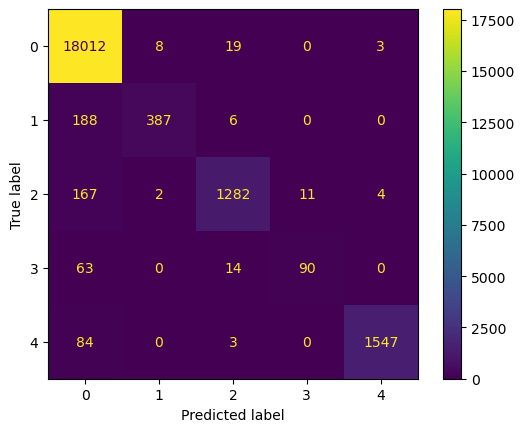

In [97]:
# Plot the confusion matrix
conmat = confusion_matrix(y_val, y_validation_prediction, labels=clf.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conmat, display_labels=clf.classes_)
display.plot()

# MLP

In [98]:
# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [99]:
clfMLP = MLPClassifier(hidden_layer_sizes=(100, 500,300,500, 100), activation ='relu', alpha = 0.25, max_iter=2000)

In [100]:
clfMLP.fit(X_train, y_train)

MLPClassifier(alpha=0.25, hidden_layer_sizes=(100, 500, 300, 500, 100),
              max_iter=2000)

In [101]:
# Make predictions on the test data
y_prediction = clfMLP.predict(X_test)

In [102]:
train_pred = clfMLP.predict(X_train)

In [103]:
train_acc_MLP = accuracy_score( y_train, train_pred) * 100
print(f'train Accuracy: {train_acc_MLP:.2f}%')

train Accuracy: 98.28%


In [104]:
accMLP = accuracy_score(y_test, y_prediction) * 100
print(f'test Accuracy: {accMLP :.2f}%')

test Accuracy: 97.80%


In [105]:
recall_MLP = recall_score(y_test, y_prediction, average = 'micro') * 100
print(f' MLP Recall: {recall_MLP :.2f}%') 

precision_MLP = precision_score(y_test, y_prediction, average = 'micro' ) * 100
print(f' MLP precision: {precision_MLP :.2f}%') 

F_score_MLP = f1_score(y_test, y_prediction, average = 'micro' ) * 100
print(f' MLP F-score: {F_score_MLP :.2f}%') 

 MLP Recall: 97.80%
 MLP precision: 97.80%
 MLP F-score: 97.80%


In [106]:
# Generate a classification report
report_MLP = classification_report(y_test, y_prediction)
print(report_MLP)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18092
           1       0.92      0.70      0.79       560
           2       0.95      0.93      0.94      1486
           3       0.70      0.63      0.66       156
           4       0.99      0.97      0.98      1596

    accuracy                           0.98     21890
   macro avg       0.91      0.84      0.87     21890
weighted avg       0.98      0.98      0.98     21890



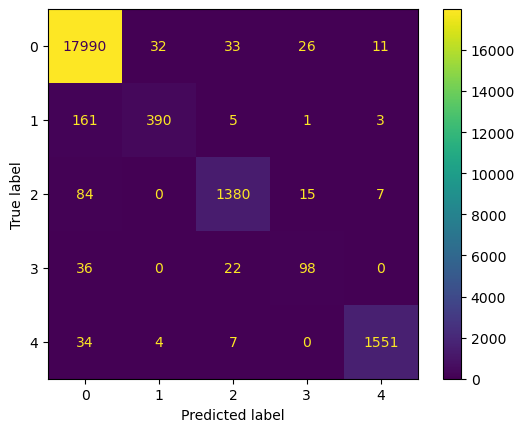

In [107]:
# Plot the confusion matrix
conmat_MLP = confusion_matrix(y_test, y_prediction, labels=clfMLP.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conmat_MLP, display_labels=clfMLP.classes_)
display.plot()

# SVM

In [57]:
from sklearn.svm import SVC

In [58]:
clf_SVC = SVC(kernel = 'poly')

In [59]:
clf_SVC.fit(X_train, y_train)

SVC(kernel='poly')

In [60]:
y_pred = clf_SVC.predict(X_test)
y_pred

array([0, 0, 0, ..., 2, 2, 0])

In [61]:
training_pred = clf_SVC.predict(X_train)

In [62]:
training_accuracy_SVC = accuracy_score( y_train, training_pred) * 100
print(f'train Accuracy: {training_accuracy_SVC:.2f}%')

train Accuracy: 96.97%


In [64]:
acc_SVC = accuracy_score(y_test, y_pred) * 100
print(f'test Accuracy: {acc_SVC :.2f}%')

test Accuracy: 96.53%


In [65]:
recall_SVC = recall_score(y_test, y_pred, average = 'micro') * 100
print(f' MLP Recall: {recall_SVC :.2f}%') 

precision_SVC = precision_score(y_test, y_pred, average = 'micro' ) * 100
print(f' MLP precision: {precision_SVC :.2f}%') 

F_score_SVC = f1_score(y_test, y_pred, average = 'micro' ) * 100
print(f' MLP F-score: {F_score_SVC :.2f}%') 

 MLP Recall: 96.53%
 MLP precision: 96.53%
 MLP F-score: 96.53%


In [66]:
# Generate a classification report
report_SVC = classification_report(y_test, y_pred)
print(report_SVC)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18092
           1       0.97      0.59      0.73       560
           2       0.96      0.85      0.90      1486
           3       0.77      0.40      0.53       156
           4       0.99      0.90      0.94      1596

    accuracy                           0.97     21890
   macro avg       0.93      0.75      0.82     21890
weighted avg       0.96      0.97      0.96     21890



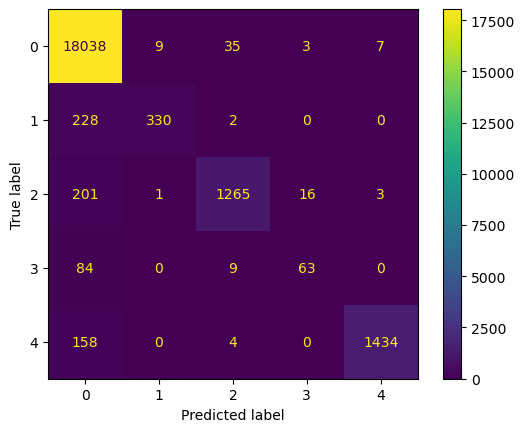

In [67]:
# Plot the confusion matrix
conmat_SVC = confusion_matrix(y_test, y_pred, labels=clf_SVC.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=conmat_SVC, display_labels=clf_SVC.classes_)
display.plot()

### Comparing the performance metrics on all the models

In [108]:
#table of metrics
model_eval= {'models':['MLP', 'SVM', 'RFS'],
'Accuracies':[accMLP,  acc_SVC, acc],
 'precisions':[precision_MLP, precision_SVC, precision_RF],
'recalls': [recall_MLP, recall_SVC, recall_RF],
'f_scores' : [F_score_MLP, F_score_SVC, F_score_RF]            
}

model_table = pd.DataFrame(model_eval)
model_table

,models,Accuracies,precisions,recalls,f_scores
0,MLP,97.802650,97.802650,97.802650,97.802650
1,SVM,96.528095,96.528095,96.528095,96.528095
2,RFS,97.386935,97.386935,97.386935,97.386935


## Accuracy

In [70]:
testAcc = [accMLP,  acc_SVC, acc]
precisions =[precision_MLP, precision_SVC, precision_RF]
recalls= [recall_MLP, recall_SVC, recall_RF]
f_scores = [F_score_MLP, F_score_SVC, F_score_RF]

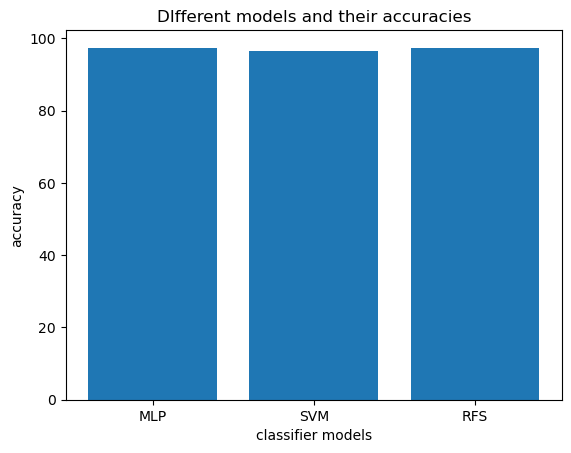

In [71]:
models = ['MLP', 'SVM', 'RFS']
plt.bar(models, testAcc)
plt.xlabel('classifier models')
plt.ylabel('accuracy')
plt.title('DIfferent models and their accuracies')
plt.show()

## Precision

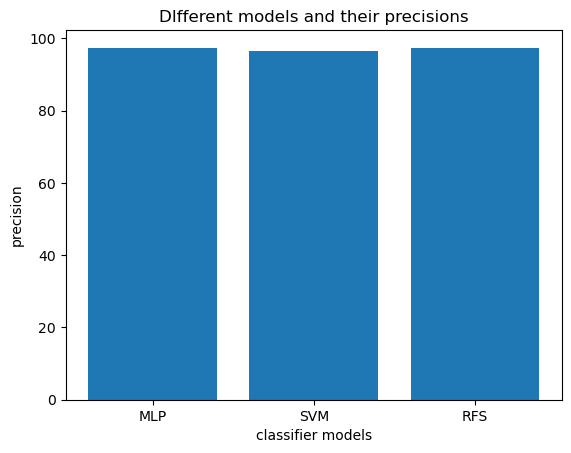

In [80]:
models = ['MLP', 'SVM', 'RFS']
plt.bar(models, precisions)
plt.xlabel('classifier models')
plt.ylabel('precision')
plt.title('DIfferent models and their precisions')
plt.show()

## Recall

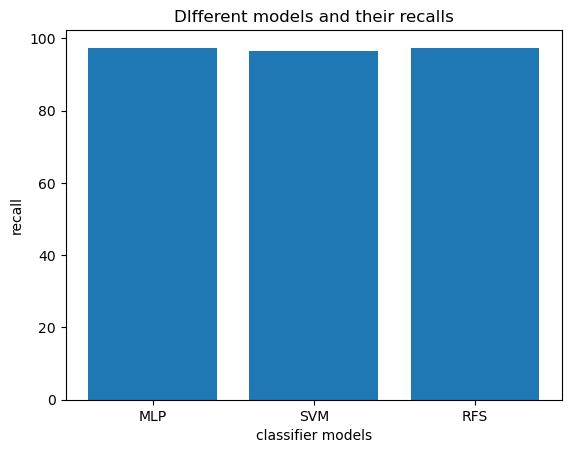

In [81]:
models = ['MLP', 'SVM', 'RFS']
plt.bar(models, recalls)
plt.xlabel('classifier models')
plt.ylabel('recall')
plt.title('DIfferent models and their recalls')
plt.show()

## F-score

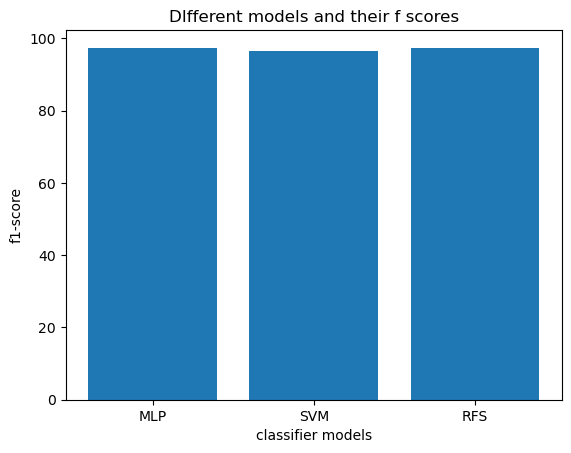

In [82]:
models = ['MLP', 'SVM', 'RFS']
plt.bar(models, f_scores)
plt.xlabel('classifier models')
plt.ylabel('f1-score')
plt.title('DIfferent models and their f scores')
plt.show()